In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
import statistics
from sklearn.metrics import mean_squared_error, mean_absolute_error
%matplotlib inline

In [3]:
temp = pd.ExcelFile('case1.xlsx')
print(temp.sheet_names)

['Заказы', 'Коробки по заказам', 'Агрегация', 'Агрегация (города)', 'Основные', 'Карманы', 'Квартили', 'Гистограмма', 'Процентили']


In [7]:
order = temp.parse('Заказы')
order.head()

,Номер заказа,Вес груза,День,Количество коробок,Город отправки,Город доставки
0,22,1122.21,1,157,Таллин,Санкт-Петербург
1,37,1110.50,1,148,Рига,Санкт-Петербург
2,64,1165.27,1,153,Москва,Рига
3,95,1157.63,1,153,Таллин,Санкт-Петербург
4,105,1000.52,1,145,Вильнюс,Санкт-Петербург


In [8]:
box = temp.parse('Коробки по заказам')
box.head()

,Номер коробки,Номер заказа,Вес коробки
0,1,1,5.88
1,2,1,5.69
2,3,1,3.69
3,4,1,5.56
4,5,1,3.45


In [23]:
order_day = order.groupby('День').agg({'Номер заказа':'count', 'Вес груза':'sum', 'Количество коробок':'sum'}).reset_index().rename(columns={'Номер заказа':'Количество заказов'})

In [25]:
print(order_day)

    День  Количество заказов  Вес груза  Количество коробок
0      1                  19   20877.61                2791
1      2                  53   60484.58                7993
2      3                  46   52247.32                6980
3      4                  42   47102.55                6280
4      5                  52   57398.69                7756
5      6                  42   47179.19                6314
6      7                  38   41938.29                5641
7      8                  37   41985.78                5580
8      9                  47   53460.71                7097
9     10                  56   63866.80                8520
10    11                  40   45119.20                6021
11    12                  42   47767.00                6308
12    13                  46   52372.08                7034
13    14                  54   61312.34                8241
14    15                  40   45227.68                6000
15    16                  36   41917.27 

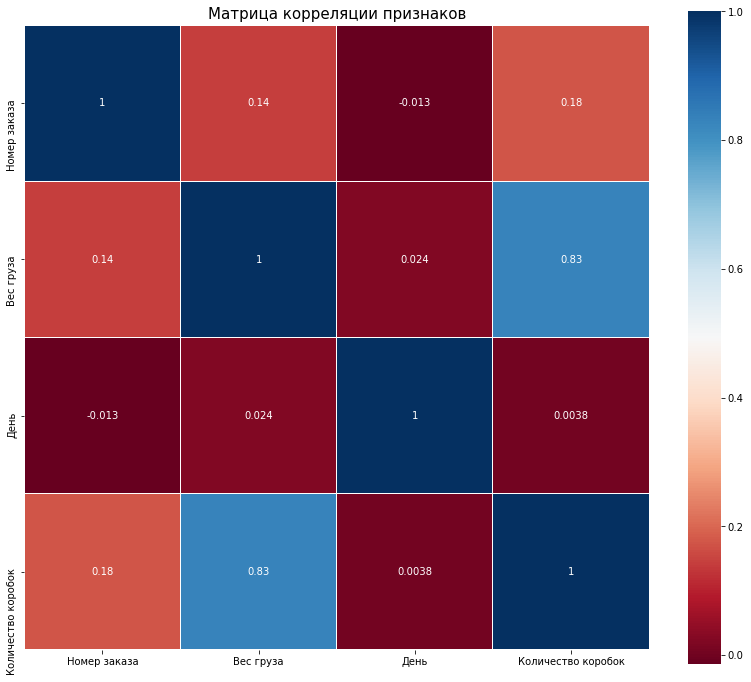

In [30]:
import seaborn as sns
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Матрица корреляции признаков', y=1, size=15)
sns.heatmap(order.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()

Исходя из данной матрицы, можно выявить, что наибольшую корреляцию между собой имеют столбцы **Количество коробок** и **Вес груза**

<AxesSubplot:title={'center':'Размах распределения для Веса груза'}>

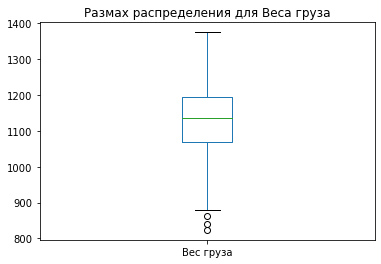

In [31]:
order['Вес груза'].plot(kind='box' , title = 'Размах распределения для Веса груза')

Медиана распределения на уровне **~1150**. Есть точки выброса, то есть, значения вне промежутка, заданного усами графика

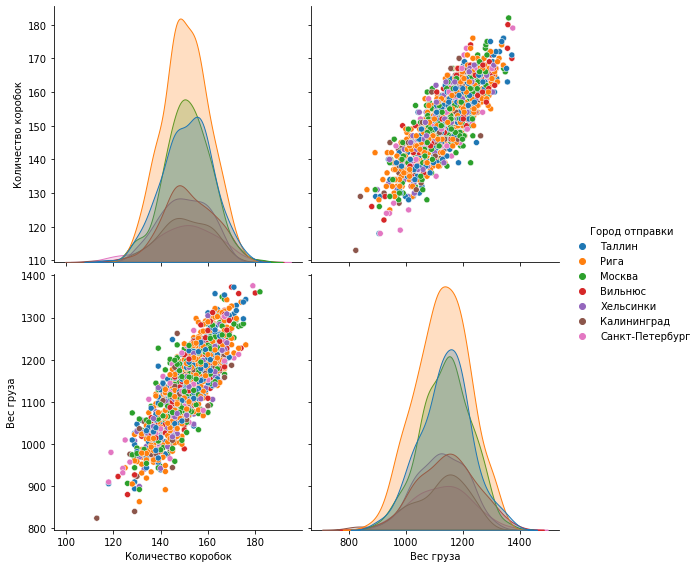

In [32]:
sns_plot = sns.pairplot(
    order[['Количество коробок','Вес груза', 'Город отправки']],  hue='Город отправки', height=4)
sns_plot

В данном примере рассмотрели взаимосвязь между тремя столбцами:**Количество коробок**, **Вес груза** и **Город отправки**. Города с наибольшими количествами коробок в заказе и, соответсвенно, наибольшим весом заказа: ``Рига``, ``Таллин`` и ``Москва`` 

In [33]:
print('Медиана =', statistics.median(order['Вес груза']))
print('Мода =', statistics.mode(order['Вес груза']))
print('Мат ожидание =', statistics.mean(order['Вес груза']))
print('Стандартное отклонение =', statistics.pstdev(order['Вес груза']))
print('Дисперсия =', statistics.pvariance(order['Вес груза']))
print('Минимум =', min(order['Вес груза']))
print('Максимум =', max(order['Вес груза']))
print('Размах =', max(order['Вес груза']) - min(order['Вес груза']))

Медиана = 1136.4499999999998
Мода = 1157.63
Мат ожидание = 1132.8550076923077
Стандартное отклонение = 91.80039069088944
Дисперсия = 8427.311730999942
Минимум = 823.52
Максимум = 1375.52
Размах = 552.0


In [44]:
order.describe()

,Номер заказа,Вес груза,День,Количество коробок
count,1300.000000,1300.000000,1300.000000,1300.000000
mean,650.500000,1132.855008,15.736154,150.870769
std,375.421985,91.835719,8.634771,10.197823
min,1.000000,823.520000,1.000000,113.000000
25%,325.750000,1067.890000,8.000000,144.000000
50%,650.500000,1136.450000,15.000000,151.000000
75%,975.250000,1195.805000,23.000000,158.000000
max,1300.000000,1375.520000,30.000000,182.000000


In [37]:
order['Вес груза'].quantile([0.25,0.5,0.75,0.76,0.77,0.8])

0.25    1067.8900
0.50    1136.4500
0.75    1195.8050
0.76    1198.1580
0.77    1200.4584
0.80    1211.7440
Name: Вес груза, dtype: float64

Путем ручного подбора параметров для ``quantile`` можно сказать, что вес **77%** заказов не превышает 1200 кг. вне зависимости от количества коробок в заказе  

In [88]:
t1 = order[order['Количество коробок'] < 141]
t1['Вес груза'].quantile([0.9969, 1.00])

0.9969    1199.777696
1.0000    1227.330000
Name: Вес груза, dtype: float64

Если учесть, что количество коробок меньше 141, то в **99,69%** вес заказов не превышает 1200кг

In [89]:
t1 = order[(order['Город отправки'] == 'Таллин') & (order['Количество коробок'] < 141)]
t1['Вес груза'].quantile([1.00])

1.0    1184.6
Name: Вес груза, dtype: float64

А если учтем еще и город отправки, то в **100%** случаях вес заказа не превышал 1200кг